# Simple Deep Learning Model - Numpy (1 of 3)

This notebook is one in a series of three with a simple deep learning model built three ways the same to compare and contrast; with just Numpy, with TensorFlow without Keras (TF1.15) and TensorFlow 2 with Keras

### Summary of the model
#### Model
- The model is a 3-layer deep neural network with the following shape: 
LINEAR (10 Neurons) -> RELU -> LINEAR (5 Neurons) -> RELU -> LINEAR (1 Neuron) -> SIGMOID

The model build follows standard Deep Learning methodology:
    1. Initialize parameters / Define hyperparameters
    2. Loop for num_iterations:
        a. Forward propagation using activation functions at each layer
        b. Compute cost function
        c. Backward propagation
        d. Update parameters (using parameters, and gradients from the 'backprop') 
    4. Use trained parameters to predict labels from a new set of data
    5. Review the performance of the model to see if it generalises well to new data
#### Parameter Initialisation
- Random parameters are chosen when they are initialised in a model to break symetery. Research has shown that He initialization works better for layers with ReLu activation. Xavier initialization works better for layers with sigmoid activation.

#### Activation Functions
- *ReLU* (Rectified Linear Unit) has superior properties over Sigmoid because it allowed to the solve vanishing / exploding gradients problem except...
- *Sigmoid* is especially useful for models which predict the probability as an output. Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice in the final layer. 

#### Cost (or loss) Function
- The model uses a straightforward 'log loss' calculation, also known as 'cross-entropy loss' to calculate the cost of the predictions vs the ground truth labels (y data) ,in this case binary cross-entropy as we are predicting 1s or 0s. .

#### Backward Propagation
- The model uses standard gradient descent also known as Stochastic gradient descent. We don't use any further optimisers such as momentum in this use-case.

#### Data
- Utlising a 2-dimensional binary classification dataset allows for the visualisation of a decision boundry learned by the model. In this case, 'make_circles' from Scikit-Learn,a simple toy dataset which produces Gaussian data with a spherical decision boundary.
- The model is universal though and can be used with data with many features, even image data.

Let's get started!

In [1]:
# Import the only library we need to build a deep learning model - Numpy.
import numpy as np
# Import Matplotlib so we can visualise the data, model learning rates, loss and accuracy
import matplotlib.pyplot as plt

In [2]:
# Import sklearn only for the dataset. 
import sklearn.datasets

def load_dataset():
    np.random.seed(1)
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
    np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))
    return train_X, train_Y, test_X, test_Y

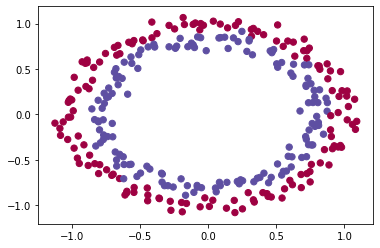

In [3]:
# load image dataset: blue/red dots in circles - data to demonstrate an organic non-linear pattern
train_X, train_Y, test_X, test_Y = load_dataset()

In [4]:
def initialize_parameters_he(layers_dims):
    """
    Utilises the Kaiming He initializer, generally suited 
    for the Relative Linear Units (ReLU) activation function.
    
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing initial random parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(1) #For consistency
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt((2/layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
    return parameters

In [5]:
def relu(x):
    """
    Computes the relu of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- relu(x)
    """
    s = np.maximum(0,x)
    
    return s

In [6]:
def sigmoid(x):
    """
    Computes the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

In [7]:
def compute_loss(a3, Y):
    
    """
    Implements the loss function on the final layer
    
    Arguments:
    a3 -- post-activation, output of forward propagation
    Y -- "true" labels vector, same shape as a3
    
    Returns:
    loss - value of the loss function
    """
    
    m = Y.shape[1]
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    loss = 1./m * np.nansum(logprobs)
    
    return loss

In [8]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for an n deep three layer neural network, 
    LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID 
    (returning a3 prior to final SIGMOID activation function)
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- true "label" vector (convention is to use 1 as the least popular label)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape ()
                    b1 -- bias vector of shape ()
                    W2 -- weight matrix of shape ()
                    b2 -- bias vector of shape ()
                    W3 -- weight matrix of shape ()
                    b3 -- bias vector of shape ()
    
    Returns:
    a3, cache of all values
    """
        
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
    return a3, cache

In [9]:
def backward_propagation(X, Y, cache):
    """
    Implements the backward propagation for an n deep three layer neural network, 
    LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
    cache -- cache output from forward_propagation()
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each 
    parameter, activation and pre-activation variables
    """
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

In [10]:
def update_parameters(parameters, grads, learning_rate=0.01):
    """
    Update parameters using gradient descent and a defined learning rate.
    
    Arguments:
    parameters -- python dictionary containing the parameters 
    grads -- python dictionary containing the gradients, output of backward_propagation
    learning_rate -- defaults to 0.01
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters['W' + str(i)] = ... 
                  parameters['b' + str(i)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for k in range(L):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        
    return parameters

In [11]:
def model(X, Y, learning_rate = 0.01, num_iterations = 40000, print_cost = True):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (number of features, number of examples)
    
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent, default is 0.01
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model ready to be used for predictions
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1] # shape of the model including number of neurons per layer
    
    # Initialize parameters dictionary.

    parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per hundreds)')
    plt.title("Loss using SGD - Numpy")
    plt.show()
    
    return parameters

Cost after iteration 0: 0.7063537226761785
Cost after iteration 1000: 0.6841673481541337
Cost after iteration 2000: 0.6743005005380617
Cost after iteration 3000: 0.6599829227378975
Cost after iteration 4000: 0.6265468981218963
Cost after iteration 5000: 0.5696674283182764
Cost after iteration 6000: 0.4852410365681537
Cost after iteration 7000: 0.3838051751444053
Cost after iteration 8000: 0.29344832759679745
Cost after iteration 9000: 0.22776369569327817
Cost after iteration 10000: 0.1832862069776236
Cost after iteration 11000: 0.15343012741586237
Cost after iteration 12000: 0.1341607092711829
Cost after iteration 13000: 0.1199317471014129
Cost after iteration 14000: 0.09323576900214209
Cost after iteration 15000: 0.08244570779016093
Cost after iteration 16000: 0.07551975494931888
Cost after iteration 17000: 0.07008175293268411
Cost after iteration 18000: 0.06568428045544278
Cost after iteration 19000: 0.061977675623457865
Cost after iteration 20000: 0.05879959346713058
Cost after iter

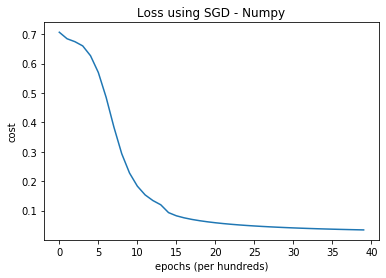

In [12]:
parameters = model(train_X, train_Y)

In [13]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  n-layer neural network
    which has utilised the Sigmoid activation function on the final layer.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    
    # Forward propagation
    a3, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    # print results
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
    return p

In [14]:
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

On the train set:
Accuracy: 0.99
On the test set:
Accuracy: 0.94


In [15]:
test_Y

array([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]])

In [16]:
predictions_test

array([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]])

In [17]:
compare = predictions_test == test_Y
print(compare)

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True False  True  True  True  True  True  True  True
  False  True  True  True  True  True  True  True False  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True False  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True False  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True False  True  True]]


In [18]:
def predict_dec(parameters, X):
    """
    Used for plotting decision boundary (no Y data).
    
    Arguments:
    parameters -- python dictionary containing parameters from the model 
    X -- data set of examples you would like to label
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Predict using forward propagation and a classification threshold of 0.5
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3>0.5)
    return predictions

In [19]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('feature 2')
    plt.xlabel('feature 1')
    plt.scatter(X[0, :], X[1, :], c=np.reshape(y,-1), cmap=plt.cm.Spectral)
    plt.show()

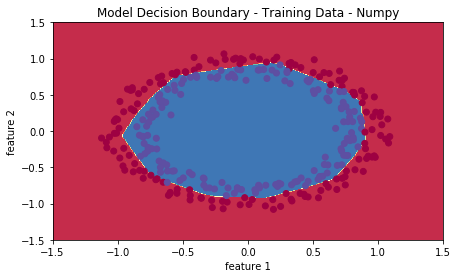

In [20]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.title("Model Decision Boundary - Training Data - Numpy")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

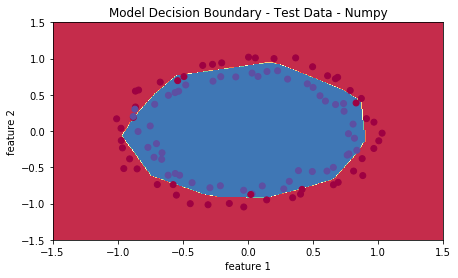

In [21]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.title("Model Decision Boundary - Test Data - Numpy")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), test_X, test_Y)